In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from utils import classification_evaluation, user_input

In [39]:
dataframe =  pd.read_csv('../data/cleaned_dataset_2.csv')

dataframe = dataframe.drop(['age', 'id'], axis=1)

In [40]:
dataframe.head()

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,140,90,3,1,0,0,1,1,55,34.927679,1
1,130,70,3,1,0,0,0,1,52,23.507805,1
2,100,60,1,1,0,0,0,0,48,23.011177,1
3,130,80,3,1,0,0,1,0,61,37.729725,1
4,130,90,3,3,0,0,1,1,62,29.983588,0


In [41]:
X1, y1 = dataframe.drop("cardio", axis=1), dataframe["cardio"]
# use the same test set as in previous lecture
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

In [42]:
X_train.shape  , X_test.shape, y_train.shape, y_test.shape

((31610, 10), (13548, 10), (31610,), (13548,))

In [43]:
X_train_for_val, X_val, y_train_for_val, y_val = train_test_split(X_train, y_train, test_size=0.2)

X_train_for_val.shape, X_val.shape, y_train_for_val.shape, y_val.shape

((25288, 10), (6322, 10), (25288,), (6322,))

In [44]:
scaler = StandardScaler()

pipeline_knn = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipeline_log_regression = Pipeline(
    [
        ("scaler", scaler),
        (
            "log",
            LogisticRegression(
                solver="saga", multi_class="ovr", max_iter=10000, penalty="elasticnet"
            ),
        ),
    ]
)
parameter_grid_knn = {"knn__n_neighbors": list(range(1, 20))}

classifier_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=parameter_grid_knn,
    scoring="accuracy",
    cv=5,
)


In [60]:
classifier_knn.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [59]:
classifier_knn.best_params_

{'knn__n_neighbors': 19}

In [57]:
classifier_knn.best_estimator_.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])>

In [45]:
classifier_knn.fit(X_train_for_val, y_train_for_val)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

              precision    recall  f1-score   support

           0       0.70      0.79      0.75      3244
           1       0.75      0.65      0.69      3078

    accuracy                           0.72      6322
   macro avg       0.73      0.72      0.72      6322
weighted avg       0.73      0.72      0.72      6322



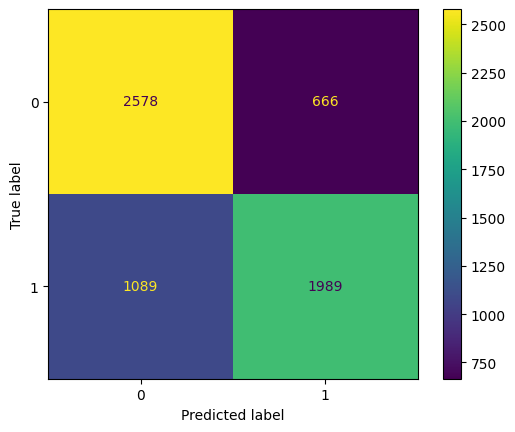

In [46]:
classification_evaluation(model=classifier_knn, x_test=X_val, y_test=y_val)

In [47]:
#Training entire X_train dataset

classifier_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [48]:
y_predictions = classifier_knn.predict(X_test)

In [49]:
print(y_predictions[:10], y_test[:10].to_list())

[1 0 0 0 1 0 0 1 0 1] [1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [50]:
X_train

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
30464,120,90,1,1,0,0,1,58,37.202381,1
41138,150,90,1,1,0,0,1,65,29.721079,1
13763,110,70,1,3,0,0,1,56,25.510204,1
6380,120,80,1,1,0,0,1,42,23.388687,0
26453,140,90,1,1,0,0,1,42,34.205830,1
...,...,...,...,...,...,...,...,...,...,...
37486,120,80,1,1,0,0,0,42,24.382373,1
25903,120,80,1,1,1,1,1,42,24.074074,0
21946,140,80,2,2,0,0,1,60,34.078462,1
35879,130,80,1,1,0,0,1,58,28.841532,1


In [71]:
user1 = user_input(ap_hi=[80], ap_lo=[60],cholesterol=[1], smoke=[0], active=[1],gluc=[1],alco=[0], age=[40],bmi=[29], gender=[1])
user1


,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,80,60,1,1,0,0,1,40,29,1


In [72]:
user2 = user_input(ap_hi=[120], ap_lo=[100],cholesterol=[2], smoke=[1], active=[0],gluc=[1],alco=[0], age=[56],bmi=[32], gender=[1])
user2

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,gender_women
0,120,100,2,1,1,0,0,56,32,1


In [62]:
dataframe

,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,gender_women
0,140,90,3,1,0,0,1,1,55,34.927679,1
1,130,70,3,1,0,0,0,1,52,23.507805,1
2,100,60,1,1,0,0,0,0,48,23.011177,1
3,130,80,3,1,0,0,1,0,61,37.729725,1
4,130,90,3,3,0,0,1,1,62,29.983588,0
...,...,...,...,...,...,...,...,...,...,...,...
45153,130,90,1,1,0,0,1,1,54,23.661439,1
45154,150,80,1,1,0,0,1,1,58,29.384757,1
45155,180,90,3,1,0,1,0,1,52,31.353579,0
45156,135,80,1,2,0,0,0,1,61,27.099251,1


---

In [63]:
explainatory, response = dataframe.drop('cardio', axis=1), dataframe['cardio']

In [64]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier(n_neighbors=19))])

# fits on all data
pipe.fit(explainatory, response)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])

In [67]:
pipe.predict(user1)

array([0])

In [70]:
pipe.predict(user2)

array([1])